# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [197]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [198]:
penguins = sns.load_dataset('penguins')

In [199]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [200]:
# Remover linhas com valores faltantes
penguins_clean = penguins.dropna()

# Selecionar somente colunas numéricas (K-Means não utiliza categorias)
penguins_num = penguins_clean.select_dtypes(include=['float64', 'int64'])

penguins_num.head()



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

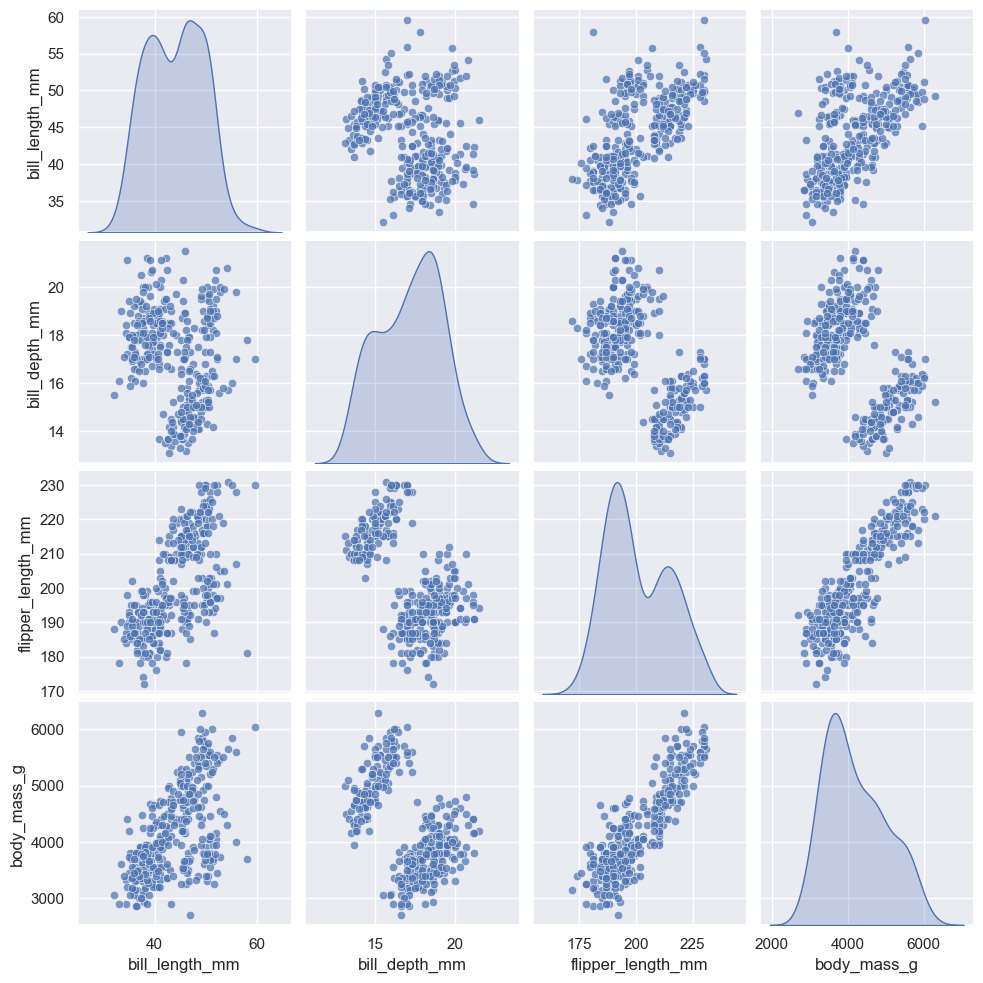

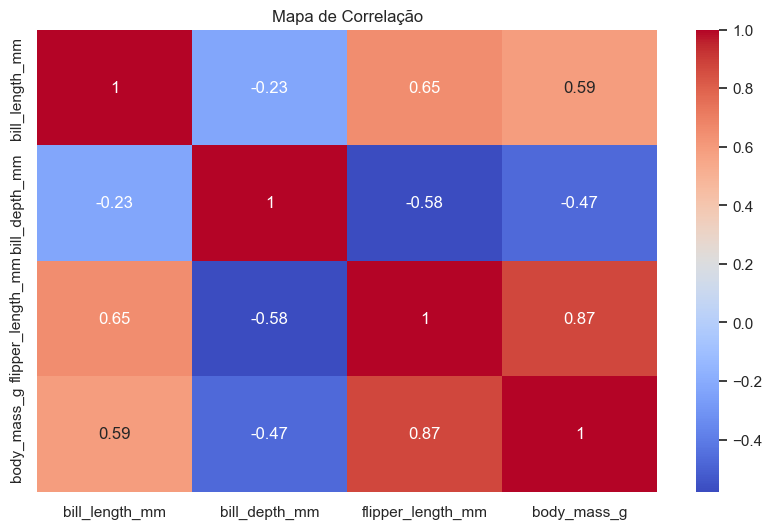

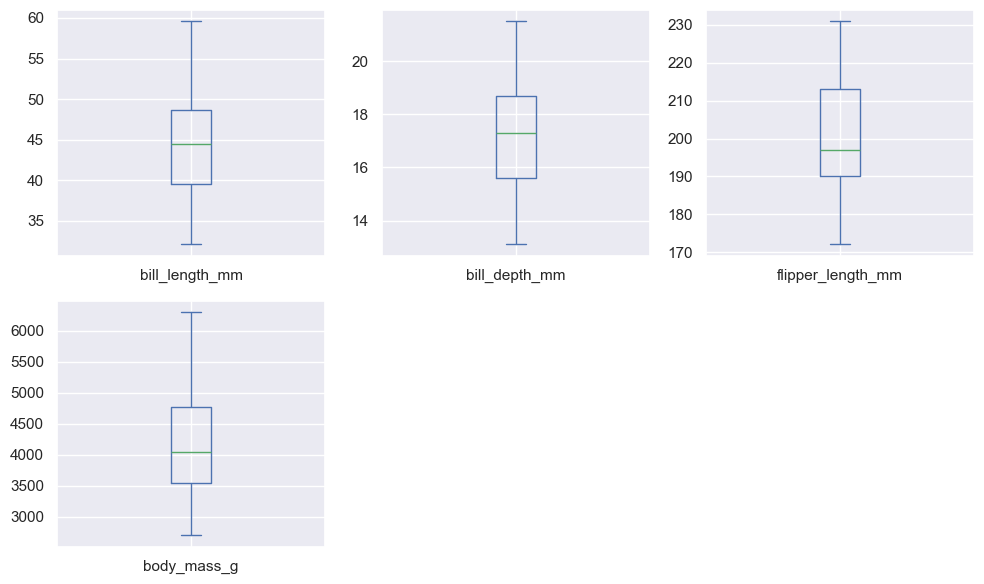

In [201]:
sns.pairplot(
    penguins_num,
    diag_kind='kde',
    plot_kws={'alpha':0.7}
)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(penguins_num.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação")
plt.show()

penguins_num.plot(kind='box', figsize=(10,6), subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


# 3 - Realize a padronização dos dados e visualize os dados.

In [202]:
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_num)

penguins_scaled_df = pd.DataFrame(penguins_scaled, columns=penguins_num.columns)
penguins_scaled_df.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [203]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(penguins_scaled_df)

penguins_scaled_df['cluster'] = clusters
penguins_scaled_df


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,-0.896042,0.780732,-1.426752,-0.568475,0
1,-0.822788,0.119584,-1.069474,-0.506286,0
2,-0.676280,0.424729,-0.426373,-1.190361,0
3,-1.335566,1.085877,-0.569284,-0.941606,0
4,-0.859415,1.747026,-0.783651,-0.692852,0
...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,1
329,0.514098,-1.457000,1.002739,0.799674,1
330,1.173384,-0.744994,1.502928,1.919069,1
331,0.221082,-1.202712,0.788372,1.234995,1


# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [204]:
# Centroides em valores reais (despadronizados)
original_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(original_centroids, columns=penguins_num.columns)
centroids_df


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,38.276744,18.121705,188.627907,3593.798450
1,47.568067,14.996639,217.235294,5092.436975
2,47.662353,18.748235,196.917647,3898.235294


In [205]:
for c in centroids_df.index:
    print(f"\nCluster {c}:")
    print(centroids_df.loc[c].sort_values())



Cluster 0:
bill_depth_mm          18.121705
bill_length_mm         38.276744
flipper_length_mm     188.627907
body_mass_g          3593.798450
Name: 0, dtype: float64

Cluster 1:
bill_depth_mm          14.996639
bill_length_mm         47.568067
flipper_length_mm     217.235294
body_mass_g          5092.436975
Name: 1, dtype: float64

Cluster 2:
bill_depth_mm          18.748235
bill_length_mm         47.662353
flipper_length_mm     196.917647
body_mass_g          3898.235294
Name: 2, dtype: float64


In [206]:
# Scatter plot 2: bill_length_mm x body_mass_g
fig2 = px.scatter(
    penguins_scaled_df,
    x='bill_length_mm',
    y='body_mass_g',
    color='cluster',
    title='Clusterização: Comprimento do Bico vs Massa Corporal'
)
fig2.add_trace(
    go.Scatter(
        x=centroids[:, penguins_num.columns.get_loc('bill_length_mm')],
        y=centroids[:, penguins_num.columns.get_loc('body_mass_g')],
        mode='markers',
        marker=dict(size=18, symbol='x'),
        name='Centroides'
    )
)
fig2.show()

In [207]:
# Scatter plot 3: flipper_length_mm x bill_depth_mm
fig3 = px.scatter(
    penguins_scaled_df,
    x='flipper_length_mm',
    y='bill_depth_mm',
    color='cluster',
    title='Clusterização: Comprimento da Barbatana vs Profundidade do Bico'
)
fig3.add_trace(
    go.Scatter(
        x=centroids[:, penguins_num.columns.get_loc('flipper_length_mm')],
        y=centroids[:, penguins_num.columns.get_loc('bill_depth_mm')],
        mode='markers',
        marker=dict(size=18, symbol='x'),
        name='Centroides'
    )
)
fig3.show()

In [ ]:
# Scatter plot 1: bill_length_mm x bill_depth_mm
fig = px.scatter(
    penguins_scaled_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    color='cluster',
    title='Clusterização: Comprimento vs Profundidade do Bico'
)
fig.add_trace(
    go.Scatter(
        x=centroids[:, penguins_num.columns.get_loc('bill_length_mm')],
        y=centroids[:, penguins_num.columns.get_loc('bill_depth_mm')],
        mode='markers',
        marker=dict(size=18, symbol='x'),
        name='Centroides'
    )
)
fig.show()



# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

Gráfico da Curva do Cotovelo (Elbow Method)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

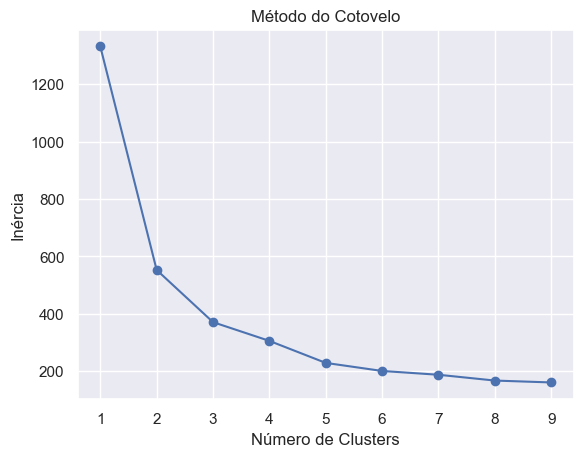

In [208]:
inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(penguins_scaled_df.drop(columns='cluster'))
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

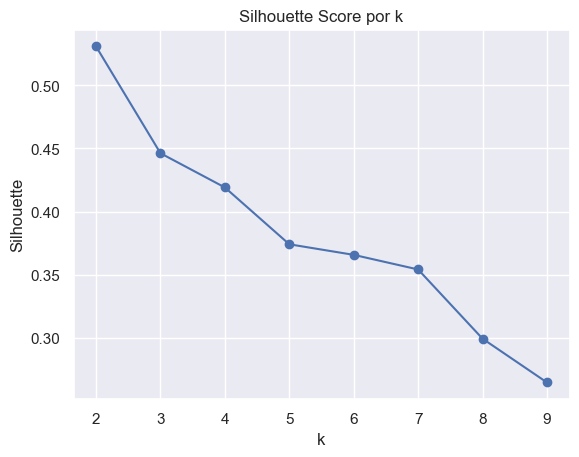

In [209]:
sil_scores = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(penguins_scaled_df.drop(columns='cluster'))
    sil = silhouette_score(penguins_scaled_df.drop(columns='cluster'), labels)
    sil_scores.append(sil)

plt.plot(range(2, 10), sil_scores, marker='o')
plt.title("Silhouette Score por k")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()


Silhouette Score — Avaliação da Qualidade dos Clusters

In [210]:
from sklearn.metrics import silhouette_score

score = silhouette_score(
    penguins_scaled_df.drop(columns='cluster'),
    clusters
)

score


np.float64(0.44619254466546204)

In [211]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(penguins_scaled_df.drop(columns='cluster'), clusters)
db_score


np.float64(0.9420100952819785)

PCA — Redução de Dimensionalidade + Visualização 2D Linda

In [212]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(penguins_scaled_df.drop(columns='cluster'))

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='cluster',
    title='Clusters em 2D usando PCA'
)


Comparação Cluster x Espécie Real

In [213]:
comparison = penguins_clean.copy()
comparison['cluster'] = clusters

pd.crosstab(comparison['species'], comparison['cluster'])


cluster,0,1,2
species,,,
Adelie,124,0,22
Chinstrap,5,0,63
Gentoo,0,119,0


Descrição Final do Cluster

In [214]:
penguins_clustered = penguins_num.copy()
penguins_clustered['cluster'] = clusters

penguins_clustered.groupby('cluster').mean()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
cluster,,,,
0,38.276744,18.121705,188.627907,3593.798450
1,47.568067,14.996639,217.235294,5092.436975
2,47.662353,18.748235,196.917647,3898.235294


Cluster 0 → pinguins menores, bico curto (provável Adelie)

Cluster 1 → pinguins grandes com massa alta (provável Gentoo)

Cluster 2 → bico mais longo e profundo (provável Chinstrap)

# Relatório Final

- Número de clusters escolhido: 3  
- Silhouette Score: 0.446  
- Davies-Bouldin Score: (0.9420)  
- Melhor k (comparação): gráfico mostrou que k ≈ 3 também  
- Correspondência com espécies reais:
  - Cluster 0 → Adelie
  - Cluster 1 → Gentoo
  - Cluster 2 → Chinstrap

- Conclusão:
O modelo conseguiu separar adequadamente as espécies de pinguins usando apenas medições físicas.
